This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [2]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)
#全都是0

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.06863035]
 [-2.7068393 ]
 [-0.5447624 ]], shape=(3, 1), dtype=float32)


In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)
#隨機取，然後後面那兩個是範圍

tf.Tensor(
[[0.44628978]
 [0.94781005]
 [0.67453635]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [6]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [7]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.08232238],
       [-0.16438441],
       [ 0.4291979 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [11]:
v.assign(tf.ones((3, 1)))
#把後面的東西assign 進V

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [12]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [14]:
v[0, 0].assign(3.)
#本來是1.1.1.，第一個被改成3

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [15]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [17]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a) #返回數字的平方根
d = b + c
e = tf.matmul(a, b) #兩個矩陣相乘
e *= d

In [19]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [20]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [21]:
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [22]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [25]:
x = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   y = tf.square(x)
gradient = tape.gradient(y, x)

In [26]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using `GradientTape` with constant tensor inputs**

In [27]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [28]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [29]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [30]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [31]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

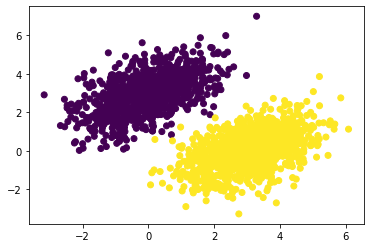

In [32]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [33]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [34]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [35]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [36]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [37]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.8029
Loss at step 1: 0.1826
Loss at step 2: 0.1063
Loss at step 3: 0.0908
Loss at step 4: 0.0840
Loss at step 5: 0.0789
Loss at step 6: 0.0743
Loss at step 7: 0.0701
Loss at step 8: 0.0662
Loss at step 9: 0.0627
Loss at step 10: 0.0595
Loss at step 11: 0.0565
Loss at step 12: 0.0538
Loss at step 13: 0.0514
Loss at step 14: 0.0491
Loss at step 15: 0.0470
Loss at step 16: 0.0451
Loss at step 17: 0.0433
Loss at step 18: 0.0417
Loss at step 19: 0.0403
Loss at step 20: 0.0389
Loss at step 21: 0.0377
Loss at step 22: 0.0365
Loss at step 23: 0.0355
Loss at step 24: 0.0346
Loss at step 25: 0.0337
Loss at step 26: 0.0329
Loss at step 27: 0.0322
Loss at step 28: 0.0315
Loss at step 29: 0.0309
Loss at step 30: 0.0303
Loss at step 31: 0.0298
Loss at step 32: 0.0293
Loss at step 33: 0.0289
Loss at step 34: 0.0285
Loss at step 35: 0.0281
Loss at step 36: 0.0278
Loss at step 37: 0.0275
Loss at step 38: 0.0272
Loss at step 39: 0.0270


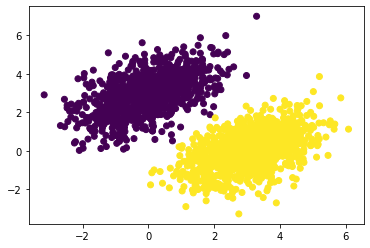

In [38]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

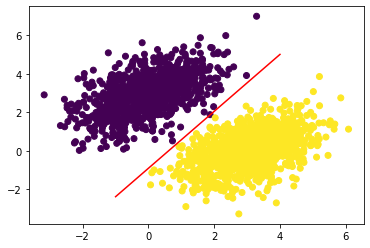

In [39]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [40]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [41]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [42]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [43]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [44]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [45]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [46]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [49]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
16/16 [==============================] - 0s 803us/step - loss: 8.6327 - binary_accuracy: 0.6610
Epoch 2/5
16/16 [==============================] - 0s 974us/step - loss: 8.2903 - binary_accuracy: 0.6710
Epoch 3/5
16/16 [==============================] - 0s 917us/step - loss: 7.9562 - binary_accuracy: 0.6825
Epoch 4/5
16/16 [==============================] - 0s 928us/step - loss: 7.6328 - binary_accuracy: 0.6930
Epoch 5/5
16/16 [==============================] - 0s 971us/step - loss: 7.3216 - binary_accuracy: 0.7005


In [50]:
history.history

{'loss': [8.632707595825195,
  8.290251731872559,
  7.956209182739258,
  7.63284969329834,
  7.321629047393799],
 'binary_accuracy': [0.6610000133514404,
  0.6710000038146973,
  0.6825000047683716,
  0.6930000185966492,
  0.7005000114440918]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [51]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 0.4150 - binary_accuracy: 0.8700 - val_loss: 0.0458 - val_binary_accuracy: 0.9883
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0693 - binary_accuracy: 0.9629 - val_loss: 0.1506 - val_binary_accuracy: 0.9667
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0745 - binary_accuracy: 0.9571 - val_loss: 0.0272 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0759 - binary_accuracy: 0.9471 - val_loss: 0.1018 - val_binary_accuracy: 0.9483
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0758 - binary_accuracy: 0.9507 - val_loss: 0.0601 - val_binary_accuracy: 0.9867


### Inference: Using a model after training

In [52]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 748us/step
[[ 0.31837404]
 [ 0.05946755]
 [ 0.5885036 ]
 [ 0.8891552 ]
 [ 0.9185024 ]
 [-0.01151893]
 [ 0.10471669]
 [ 0.77878   ]
 [ 0.66410834]
 [ 0.12510487]]


## Summary